In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df = df.rename(columns={"Unnamed: 0":"States"})
df.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.shape

(50, 5)

In [7]:
df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 5)

In [10]:
df[df.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


In [11]:
df.describe(include='all')

,States,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


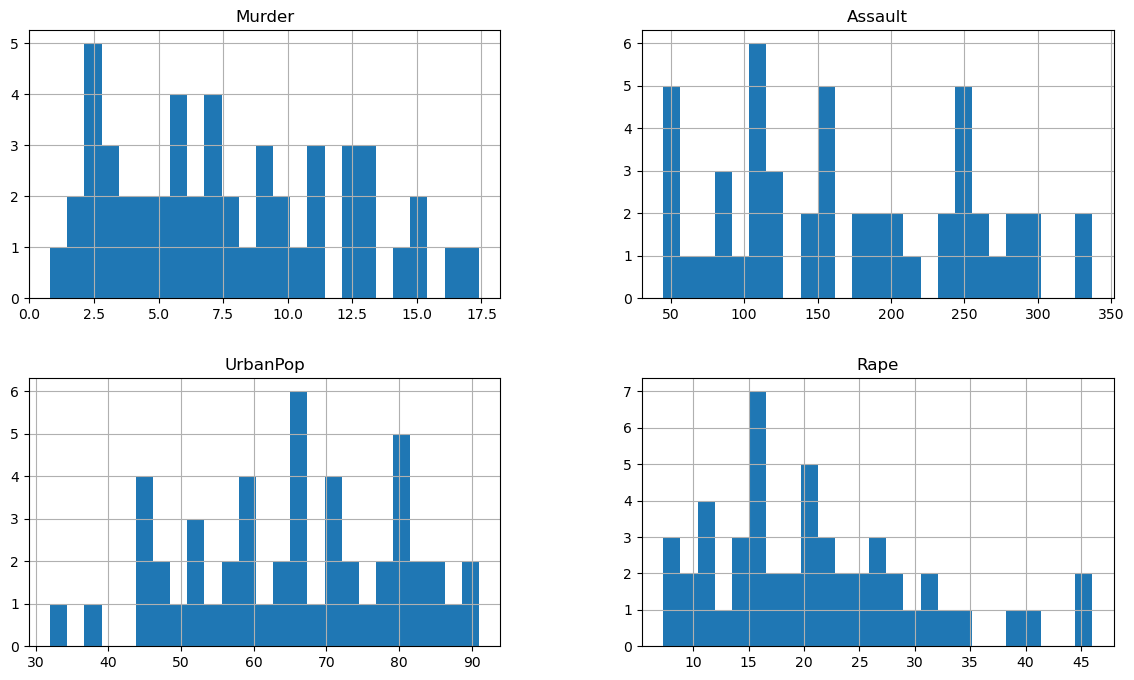

In [13]:
df.hist(figsize=(14,8),bins=25)
plt.show()

<Axes: >

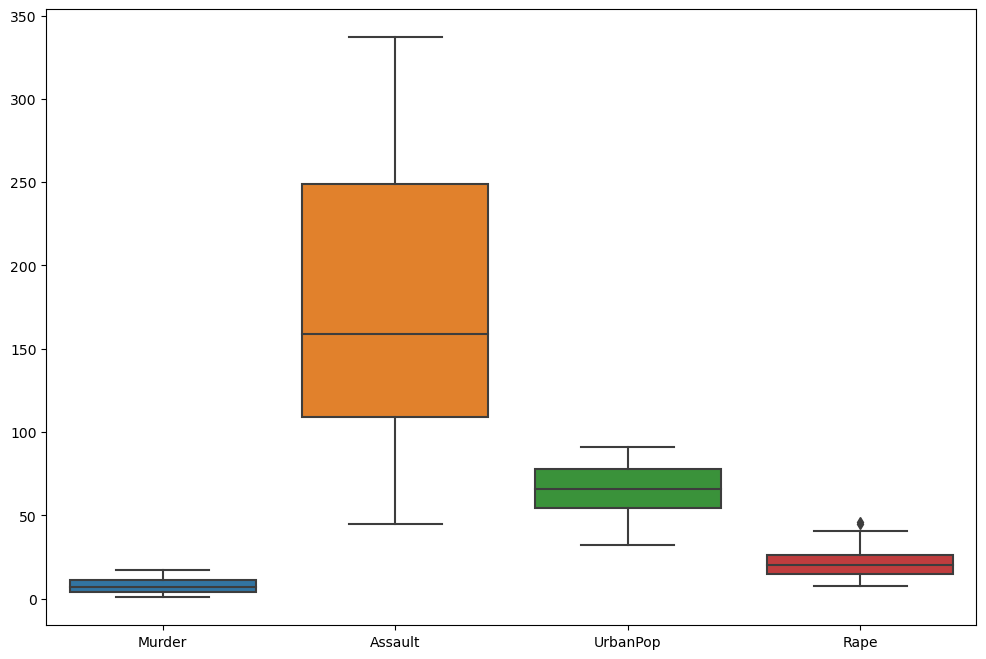

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [15]:
df.corr()

C:\Users\Rathnavel\AppData\Local\Temp\ipykernel_20556\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


C:\Users\Rathnavel\AppData\Local\Temp\ipykernel_20556\2085313674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


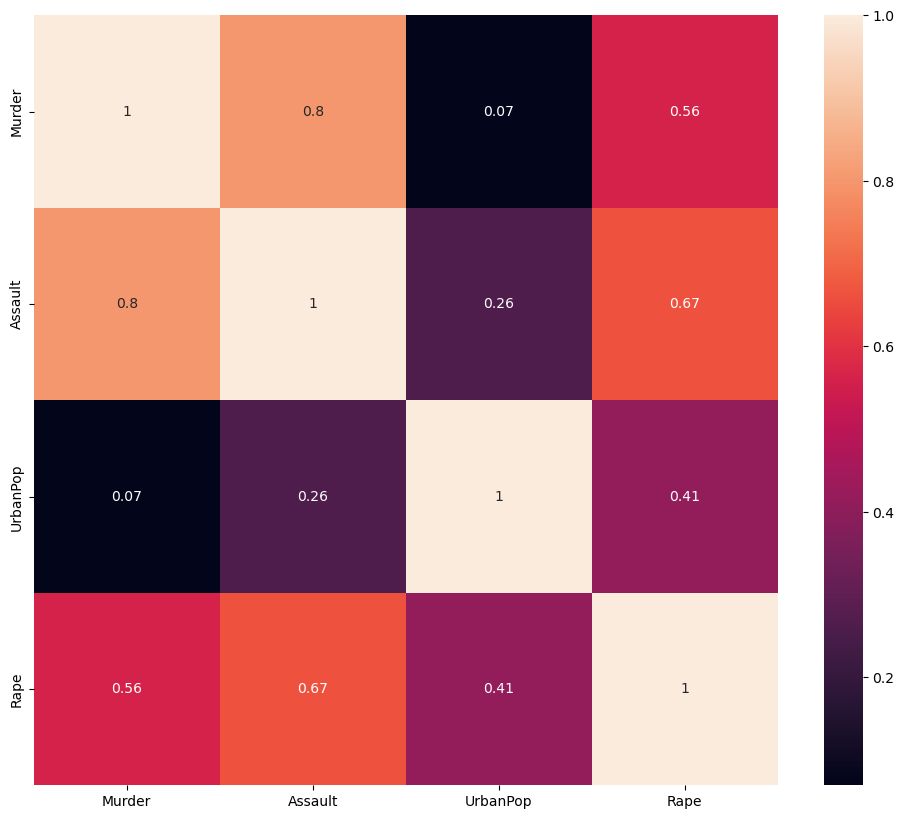

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

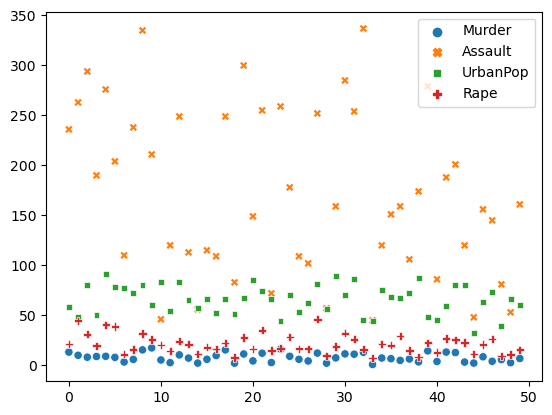

In [17]:
sns.scatterplot(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [18]:
crimenumvalues = df.drop(['States'], axis=1)

In [19]:
crimenumvalues

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [20]:
stascal = StandardScaler()
minmax = MinMaxScaler()

In [21]:
features= pd.DataFrame(minmax.fit_transform(crimenumvalues),columns=crimenumvalues.columns)

In [22]:
features

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [23]:
features.shape

(50, 4)

#  Hierarchial clustering

In [24]:
agg= AgglomerativeClustering(n_clusters=7)

In [34]:
cl =agg.fit(features)

In [35]:
np.unique(cl.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [36]:
silhouette_score(features,cluster.labels_)

0.6895525566573975

In [37]:
import scipy.cluster.hierarchy as sch

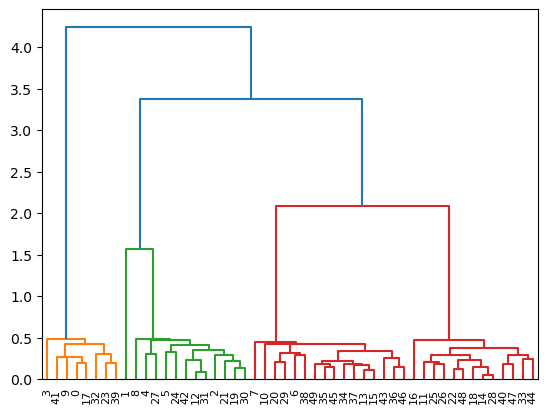

In [90]:
dendrogram= sch.dendrogram(sch.linkage(features, method='average'))

# K-means

In [43]:
b=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(features)
    b.append(kmeans.inertia_)

C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL

In [60]:
b

[66.06412255025643,
 22.48326700660931,
 12.432760739386055,
 3.6908204103921114,
 3.3287069007121257,
 3.00272685473856,
 2.7550163077471823,
 2.484108149861021,
 2.2037789334673317,
 1.9686199015795909]

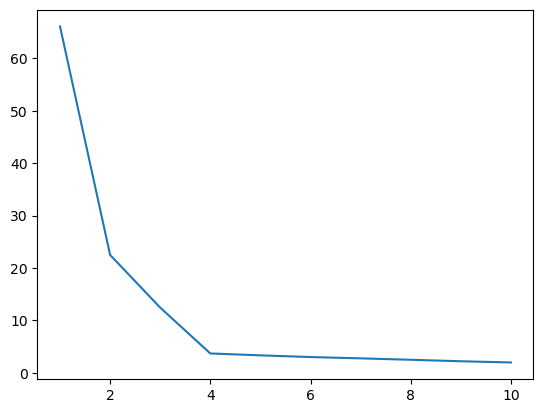

In [44]:
plt.plot(range(1,11),b)

In [45]:
kmeans= KMeans(n_clusters=4)

In [52]:
cl2= kmeans.fit(features)
cl2

C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rathnavel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [53]:
np.unique(cl2.labels_)

array([0, 1, 2, 3])

In [84]:
features['clusterkmean'] = cl2.labels_

In [85]:
features

,Murder,Assault,UrbanPop,Rape,cluster,clusters,clustersDB,clusterkmean
0,0.746988,0.654110,0.440678,0.359173,0,-1,-1,0
1,0.554217,0.746575,0.271186,0.961240,3,-1,-1,3
2,0.439759,0.852740,0.813559,0.612403,3,0,0,3
3,0.481928,0.496575,0.305085,0.315245,0,-1,-1,0
4,0.493976,0.791096,1.000000,0.860465,3,0,0,3
5,0.427711,0.544521,0.779661,0.811370,3,0,0,3
6,0.150602,0.222603,0.762712,0.098191,1,1,1,1
7,0.307229,0.660959,0.677966,0.219638,1,1,1,1
8,0.879518,0.993151,0.813559,0.635659,3,0,0,3
9,1.000000,0.568493,0.474576,0.478036,0,-1,-1,0


In [58]:
cl2.cluster_centers_

array([[ 7.91415663e-01,  6.80222603e-01,  3.68644068e-01,
         3.64664083e-01,  3.00000000e+00],
       [ 2.92545181e-01,  3.21489726e-01,  7.09745763e-01,
         2.96673127e-01, -2.22044605e-16],
       [ 1.68674699e-01,  1.14857745e-01,  3.40286832e-01,
         1.26018684e-01,  1.00000000e+00],
       [ 6.03336423e-01,  7.27344573e-01,  7.45762712e-01,
         6.69051878e-01,  2.00000000e+00]])

In [59]:
silhouette_score(features,cl2.labels_)

0.7003561527672866

# DB Scan

In [66]:
features.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,3


In [64]:
eps=[0.1,0.2,0.3,0.4,0.5]
min_node= range(1,10)

In [67]:
output=[]
for mn in min_node:
    for ep in eps:
        labels= DBSCAN(eps=ep, min_samples=mn).fit(features).labels_
    if len(set(labels)) > 1:
        score= silhouette_score(features,labels)
        output.append((ep,mn,score))

In [68]:
output

[(0.5, 1, 0.610464258307077),
 (0.5, 2, 0.610464258307077),
 (0.5, 3, 0.610464258307077),
 (0.5, 4, 0.610464258307077),
 (0.5, 5, 0.610464258307077),
 (0.5, 6, 0.610464258307077),
 (0.5, 7, 0.610464258307077),
 (0.5, 8, 0.610464258307077),
 (0.5, 9, 0.6345979360828837)]

In [69]:
a=pd.DataFrame(output)

In [70]:
b=a.iloc[:,2].max()

In [71]:
a[a[2]==b]

,0,1,2
8,0.5,9,0.634598


In [77]:
labels= DBSCAN(eps=0.5, min_samples=9)

In [78]:
labels.fit(features)

DBSCAN(min_samples=9)

In [79]:
labels.labels_

array([-1, -1,  0, -1,  0,  0,  1,  1,  0, -1,  1,  2,  0,  1,  2,  1,  2,
       -1,  2,  0,  1,  0,  2, -1,  0,  2,  2,  0,  2,  1,  0,  0, -1,  2,
        1,  1,  1,  1,  1, -1,  2, -1,  0,  1,  2,  1,  1,  2,  2,  1],
      dtype=int64)

In [82]:
features['clustersDB'] = labels.labels_

In [83]:
features

,Murder,Assault,UrbanPop,Rape,cluster,clusters,clustersDB
0,0.746988,0.654110,0.440678,0.359173,0,-1,-1
1,0.554217,0.746575,0.271186,0.961240,3,-1,-1
2,0.439759,0.852740,0.813559,0.612403,3,0,0
3,0.481928,0.496575,0.305085,0.315245,0,-1,-1
4,0.493976,0.791096,1.000000,0.860465,3,0,0
5,0.427711,0.544521,0.779661,0.811370,3,0,0
6,0.150602,0.222603,0.762712,0.098191,1,1,1
7,0.307229,0.660959,0.677966,0.219638,1,1,1
8,0.879518,0.993151,0.813559,0.635659,3,0,0
9,1.000000,0.568493,0.474576,0.478036,0,-1,-1


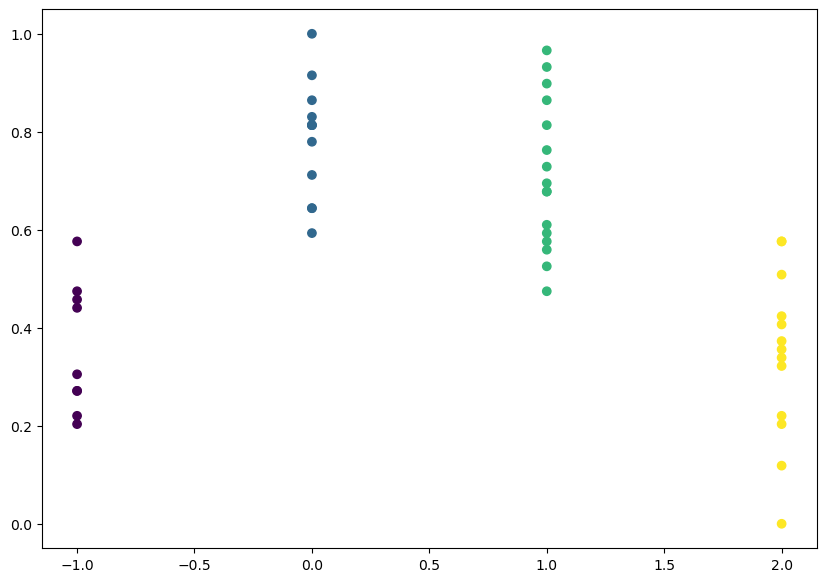

In [89]:
plt.figure(figsize=(10, 7))  
plt.scatter(features['clustersDB'],features['UrbanPop'], c=labels.labels_)